<a href="https://colab.research.google.com/github/cedjustin/AI/blob/master/Sprint23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 問題1　各種手法の実行

## ①SimpleRNN

In [ ]:
# ライブラリのimport 
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

In [ ]:
# imdbデータの読み込みと整形
max_features = 20000
maxlen = 80
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# 確認
x_train.shape, y_train.shape,x_test.shape, y_test.shape

In [ ]:
# モデルの定義
# Embeddingに関して：https://kento1109.hatenablog.com/entry/2017/12/02/114515
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
# コンパイルと学習
batch_size = 32

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=1,
    validation_data=(x_test, y_test)
)

In [ ]:
# 評価
score, acc = model.evaluate(
    x_test, 
    y_test,
    batch_size=batch_size
)

print('Test score:', score)
print('Test accuracy:', acc)

# ②SimpleRNN

In [ ]:
# ライブラリのimport
from keras.layers.recurrent import SimpleRNN
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.datasets import imdb
from keras import backend as K

In [ ]:
# imdbデータの読み込みと整形
max_features = 20000
maxlen = 80
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# 確認
x_train.shape, y_train.shape,x_test.shape, y_test.shape

In [ ]:
# モデルの定義
# Embeddingに関して：https://kento1109.hatenablog.com/entry/2017/12/02/114515
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
# コンパイルと学習
batch_size = 32

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=1,
    validation_data=(x_test, y_test)
)

In [ ]:
# 評価
score, acc = model.evaluate(
    x_test, 
    y_test,
    batch_size=batch_size
)

print('Test score:', score)
print('Test accuracy:', acc)

# ③GRU

In [ ]:
# ライブラリのimport
from keras.layers.recurrent import GRU
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.datasets import imdb
from keras import backend as K

In [ ]:
# imdbデータの読み込みと整形
max_features = 20000
maxlen = 80
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# 確認
x_train.shape, y_train.shape,x_test.shape, y_test.shape

In [ ]:
# モデルの定義
# Embeddingに関して：https://kento1109.hatenablog.com/entry/2017/12/02/114515
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
# コンパイルと学習
batch_size = 32

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=1,
    validation_data=(x_test, y_test)
)

In [ ]:
# 評価
score, acc = model.evaluate(
    x_test, 
    y_test,
    batch_size=batch_size
)

print('Test score:', score)
print('Test accuracy:', acc)

# ④ConvLSTM2D

In [1]:
# ライブラリのimport
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K
%matplotlib notebook
if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

Using TensorFlow backend.


In [2]:
# データ作成
def generate_movies(n_samples=1200, n_frames=15):
    """テスト動画作成関数（理解不要）
    Parameters
    -----------
    n_samples : 動画数 
    n_frames : フレーム数
    """
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# 上記関数実行
noisy_movies, shifted_movies = generate_movies(n_samples=1200)

<IPython.core.display.Javascript object>


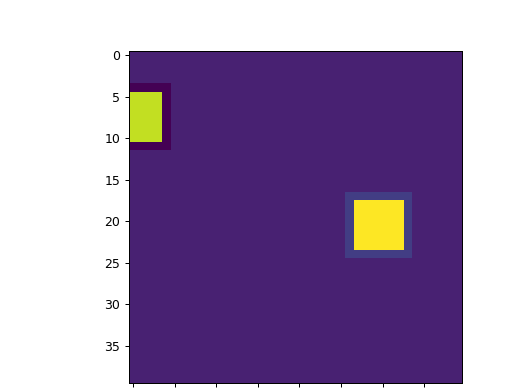

In [13]:
# どのようなデータが生成されているか出力
# データ選択
index = 1
x= noisy_movies[index]

# 描画
fig= plt.figure()
viewer= fig.add_subplot(111)
plt.ion()
fig.show()
for i in range(len(x)):
    viewer.clear()
    viewer.imshow(x[i])
    plt.pause(.1)
    fig.canvas.draw()

In [4]:
# モデルの定義とコンパイル
seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

seq.summary()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 40, 40, 40)  59200     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 40, 40, 40)  160       
__________________________________________

In [5]:
# 学習
seq.fit(
    noisy_movies[:100], 
    shifted_movies[:100], 
    batch_size=10,
    epochs=1, 
    validation_split=0.05
)




Train on 95 samples, validate on 5 samples
Epoch 1/1





95/95 [==============================] - 72s 762ms/step - loss: 0.8074 - val_loss: 0.5385


<IPython.core.display.Javascript object>


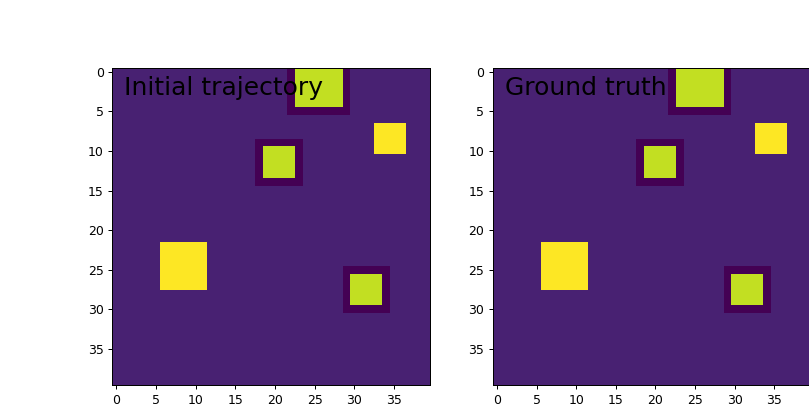

<IPython.core.display.Javascript object>


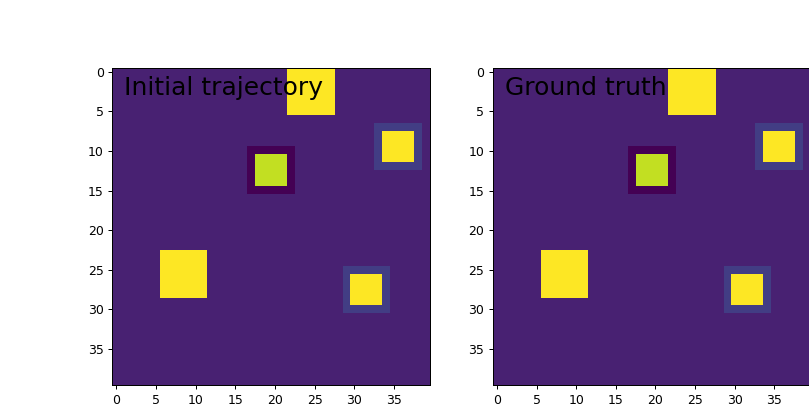

<IPython.core.display.Javascript object>


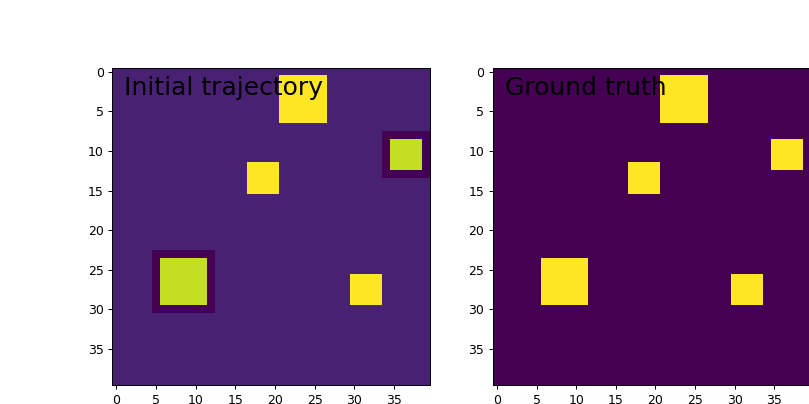

<IPython.core.display.Javascript object>


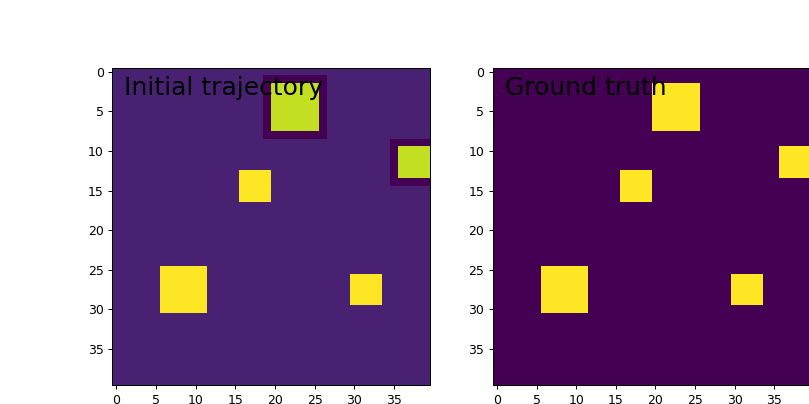

<IPython.core.display.Javascript object>


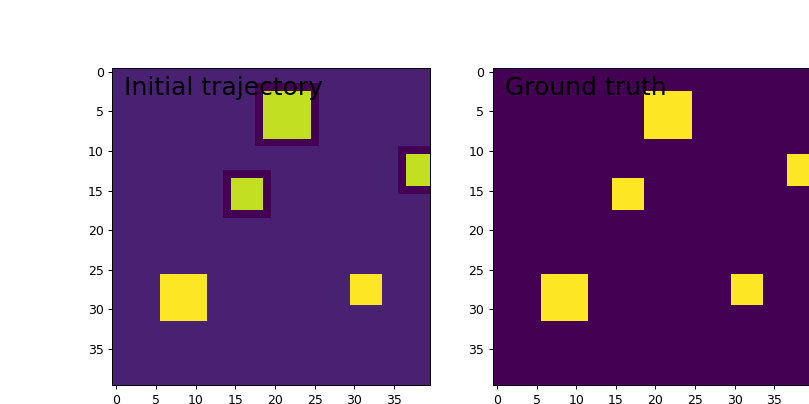

<IPython.core.display.Javascript object>


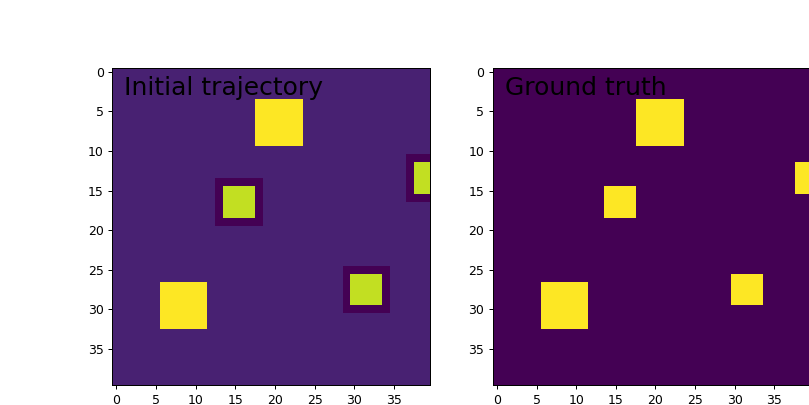

<IPython.core.display.Javascript object>


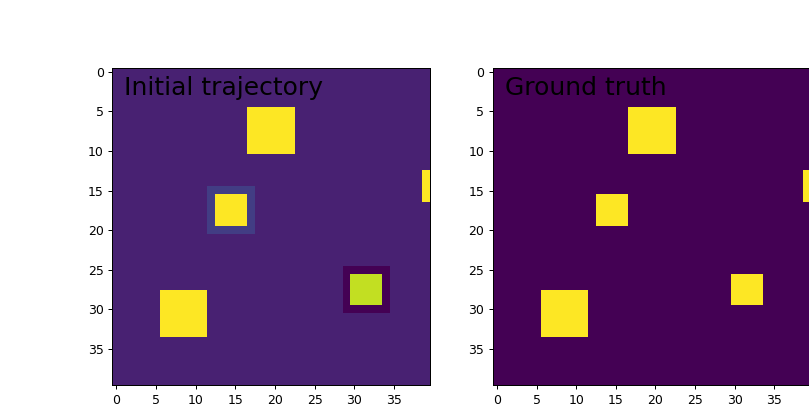

<IPython.core.display.Javascript object>


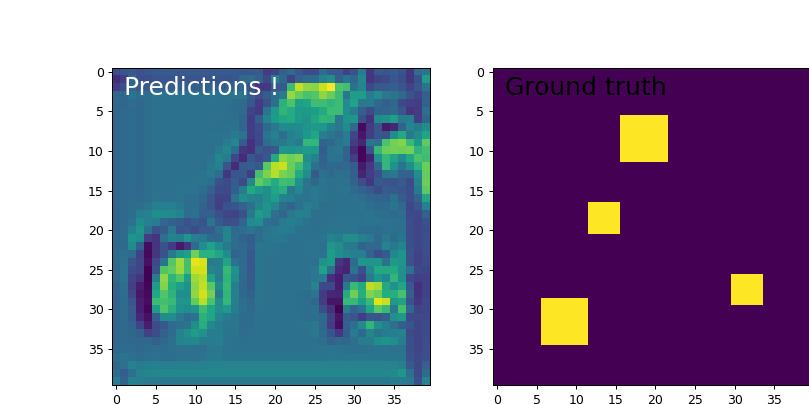

<IPython.core.display.Javascript object>


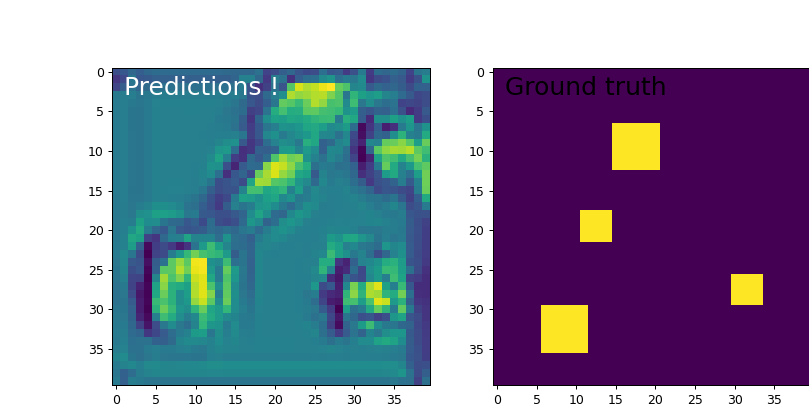

<IPython.core.display.Javascript object>


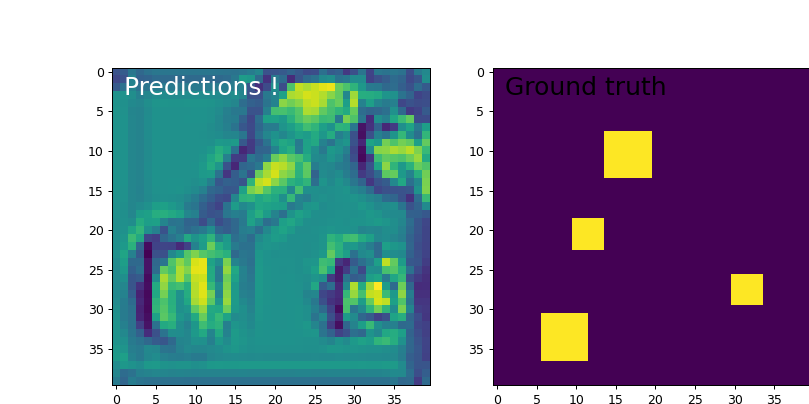

<IPython.core.display.Javascript object>


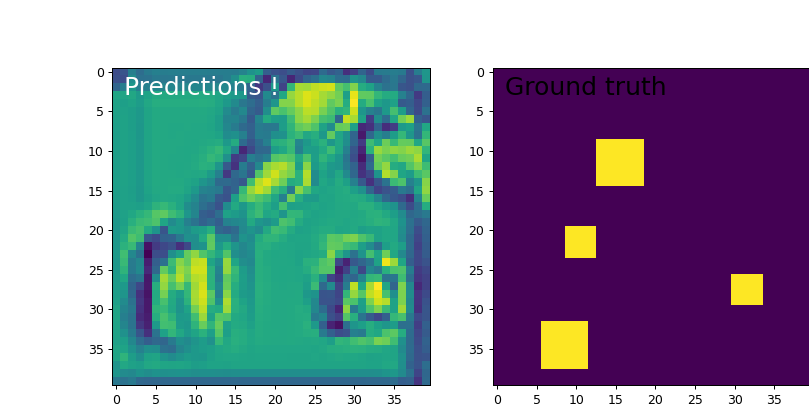

<IPython.core.display.Javascript object>


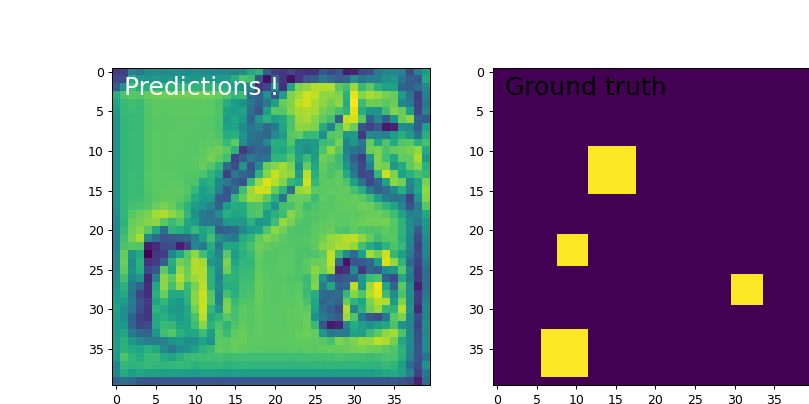

<IPython.core.display.Javascript object>


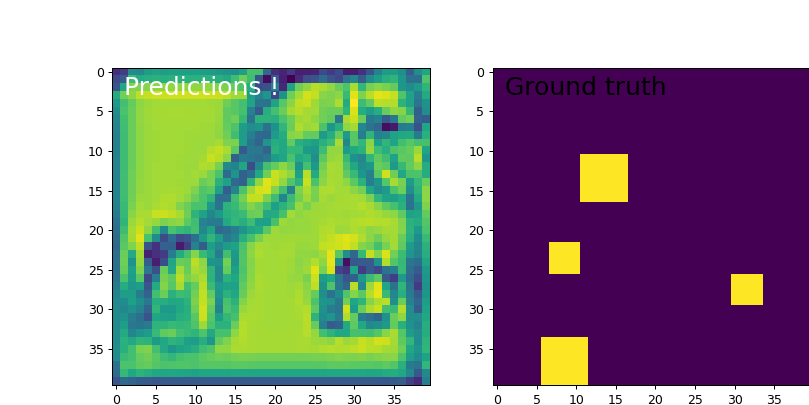

<IPython.core.display.Javascript object>


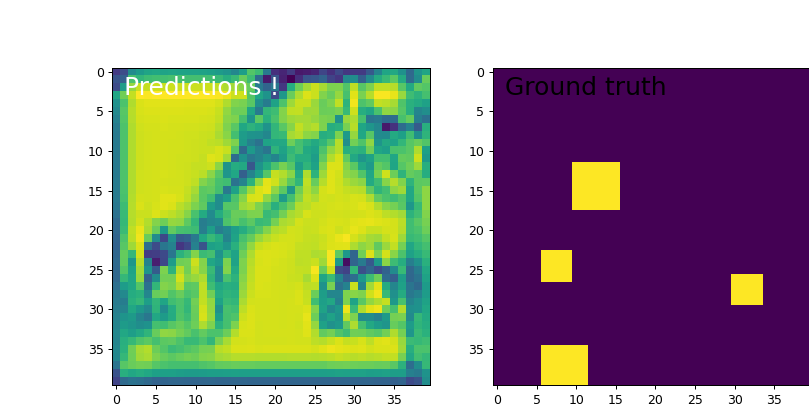

<IPython.core.display.Javascript object>


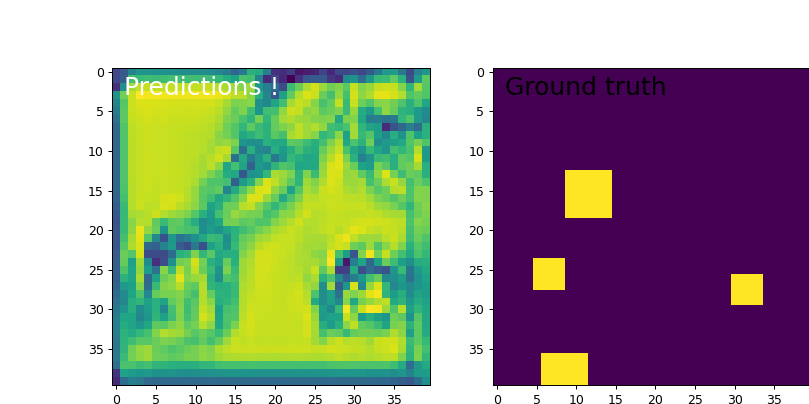

In [15]:
# テスト用データ取得
which = 1004
track = noisy_movies[which][:7, ::, ::, ::] # 7フレームまで取得
track2 = noisy_movies[which][::, ::, ::, ::] # 正解データ

# 予測
for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)

# 描画
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    # 初期化
    fig = plt.figure(figsize=(10, 5))
    
    ## 予測値描画
    ax = fig.add_subplot(121)
    # テキスト
    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)
    # 描画
    toplot = track[i, ::, ::, 0]
    plt.imshow(toplot)
    
    ## 実測値描画
    ax = fig.add_subplot(122)
    # テキスト
    plt.text(1, 3, 'Ground truth', fontsize=20)
    # 描画
    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]
    plt.imshow(toplot)
    
    ## 保存
    plt.savefig('%i_animate.png' % (i + 1))

# 問題3　他のクラスの説明

- RNN リカレントニューラルネットワーク（RNN）とは、ノード間の接続が時間的な順序に沿った有向グラフを形成する人工ニューラルネットワークのクラスです。

- SimpleRNNCell：SimpleRNNのCellクラスです。セルは、再帰的に現れる同じネットワーク構造です。

- GRUCell: LSTMを簡略化したゲートを持つ再帰的なユニットであるgru layerのセルクラスです。

- LSTMCell: 基本的にはLSTM層用のCellクラスで、1ステップ分の計算ロジックを含んでいます

- StackedRNNCells: RNNセルスタックの動作を単一セルのように見せるためのラッパーです。

- CuDNNGRU：CuDNNを使った高速GRUの実装です。

- CuDNNLSTM：CuDNNを用いた高速なLSTM実装です。